In [1]:
import sys 
import os

#BaM Stuff
sys.path.append(os.path.abspath("/Users/mouginot/work/helpmetric"))
import cymetrichelper as cyh
import pandahelper as pdh


import cymetric as cym
import pandas as pd

import matplotlib.pyplot as plt
from cymetric import graphs as cgr
from cymetric import timeseries as tm

%matplotlib inline

/opt/local/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/importlib/_bootstrap.py:222: QAWarning: pyne.data is not yet QA compliant.
  return f(*args, **kwds)
/opt/local/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/importlib/_bootstrap.py:222: QAWarning: pyne.material is not yet QA compliant.
  return f(*args, **kwds)
/opt/local/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/importlib/_bootstrap.py:222: QAWarning: pyne.enrichment is not yet QA compliant.
  return f(*args, **kwds)


In [3]:
flow = cyh.MakeFlowGraph("ref/0.h5")

In [35]:
flow.body = list(set(flow.body))
flow.body

['\tlwr_a -> cool_lwr_a [label=""]',
 '\tenrichment -> lwr_a [label=""]',
 '\tlwr_b -> cool_lwr_a [label=""]',
 '\tstr_pu -> fab_sfr [label=""]',
 '\tstr_sfr_a',
 '\tcool_lwr_a -> str_lwr_a [label=""]',
 '\tfab_sfr -> sfr_a [label=""]',
 '\tstr_lwr_a -> separation [label=""]',
 '\tstr_pu',
 '\tenrichment -> lwr_b [label=""]',
 '\tseparation',
 '\tstr_du',
 '\twaste',
 '\tstr_sfr_b -> separation [label=""]',
 '\tcool_lwr_a',
 '\tenrichment -> str_du [label=""]',
 '\tstr_sfr_b',
 '\tcool_sfr_a',
 '\tsfr_b -> cool_sfr_b [label=""]',
 '\tenrichment',
 '\tseparation -> waste [label=""]',
 '\tcool_sfr_a -> str_sfr_a [label=""]',
 '\tfab_sfr',
 '\tsfr_a -> cool_sfr_a [label=""]',
 '\tcool_sfr_b',
 '\tsfr_a',
 '\tseparation -> str_pu [label=""]',
 '\tlwr_a',
 '\tcool_sfr_b -> str_sfr_b [label=""]',
 '\tlwr_b',
 '\tstr_sfr_a -> separation [label=""]',
 '\tsfr_b',
 '\tfab_sfr -> sfr_b [label=""]',
 '\tstr_lwr_a']

In [28]:
for node in flow.body:
    if "deployer" in node:
        flow.body.remove(node)
    if "str_lwr_b" in node:
        flow.body.remove(node)
    if "cool_lwr_b" in node:
        flow.body.remove(node)
    if "init" in node:
        flow.body.remove(node)
    if "src_u_nat" in node:
        flow.body.remove(node)
    if "str_ru" in node:
        flow.body.remove(node)




        

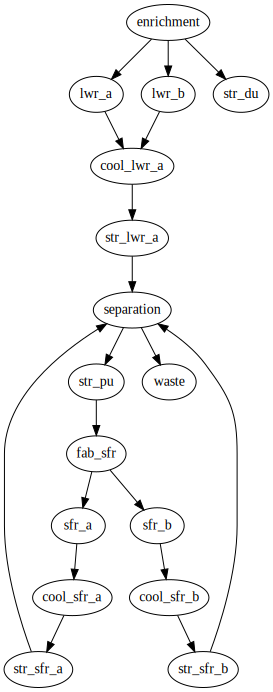

In [34]:
flow

In [31]:
flow.render("flow.png")

'flow.png.pdf'

In [3]:
db = cym.dbopen("main.h5")
ev = cym.Evaluator(db=db, write=False)

In [4]:
dfp = tm.get_power(ev)

#dfp['Time'] *= 1/12.

/Users/mouginot/.local/lib/python3.5/site-packages/cymetric/timeseries.py:226: UserWarning: no faciity provided
  warnings.warn(wng_msg, UserWarning)


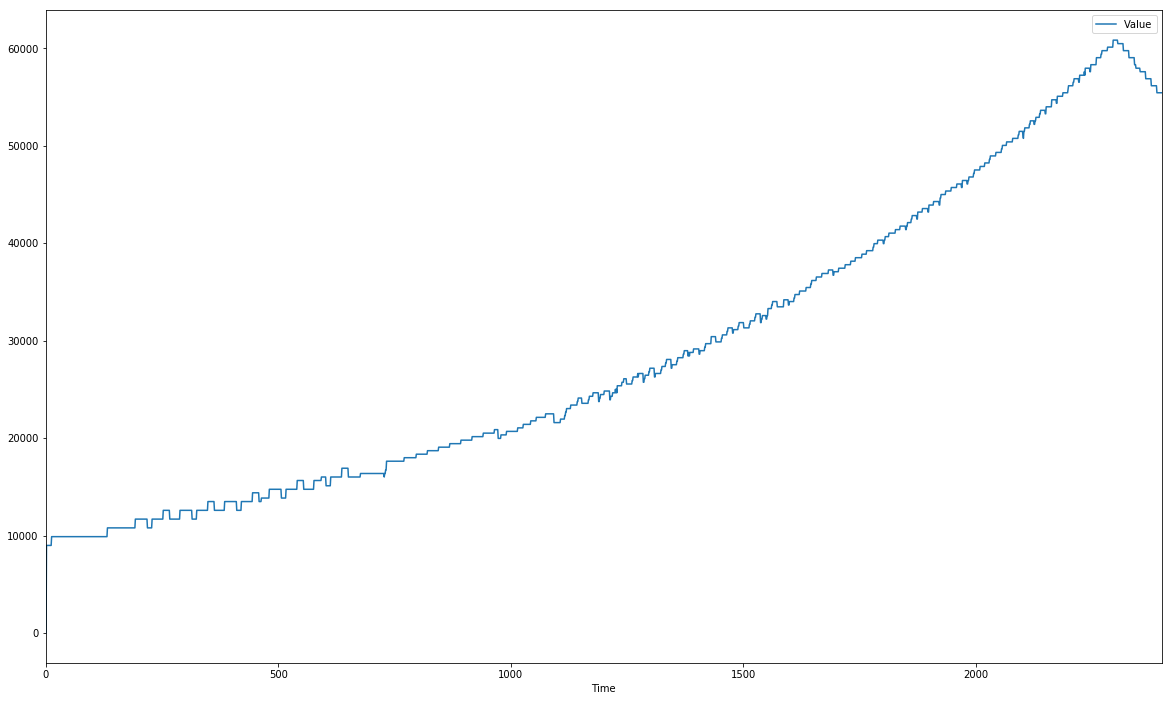

In [5]:
dfp.plot('Time','Value',figsize = (20,12))

In [6]:
fac = ['str_pu']
nucs = ()
coms = ()


df3 = tm.inventories(ev, facilities=fac)
df3['Time'] *= 1/12.

/Users/mouginot/.local/lib/python3.5/site-packages/cymetric/timeseries.py:133: UserWarning: no nuclide provided
  warnings.warn(wng_msg, UserWarning)


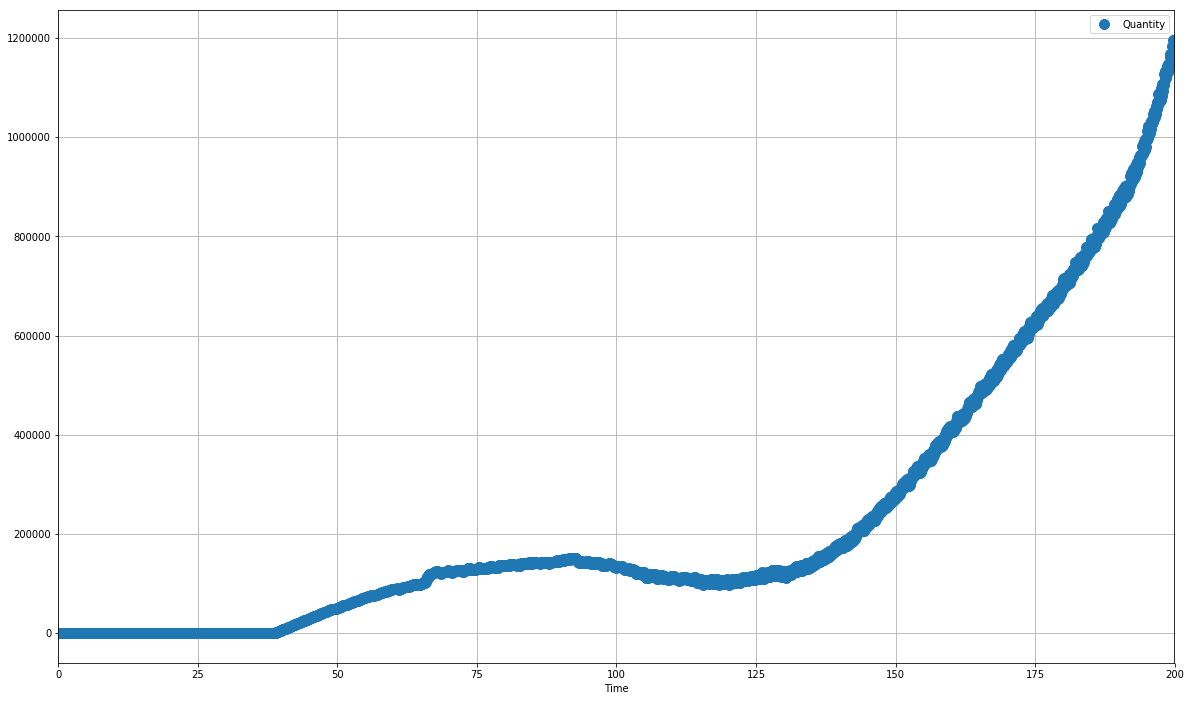

In [7]:
df3_y_m = df3
ax = df3_y_m.plot('Time','Quantity',linestyle='', marker='.', markersize='20' ,figsize = (20,12))
# Major ticks every 20, minor ticks every 5
#import numpy as np
#major_y_ticks = np.arange(0, 60, 1)

#ax.set_yticks(major_y_ticks)
#major_x_ticks = np.arange(0, 200, 5)
#ax.set_xticks(major_x_ticks)



# And a corresponding grid
ax.grid(which='both')

plt.show()

In [8]:
rec = ()
send = ['fab_sfr']
nucs = ()
coms = ()

sfr_frac = cyh.TransFrac(ev=ev, rec=rec, send=send, nucs2=['PU238','PU239','PU240','PU241','PU242'],nucs1=['U235','U238'])

In [9]:
sfr_frac

,Time,Mass
0,0,NaN
1,1,NaN
2,2,NaN
3,3,NaN
4,4,NaN
5,5,NaN
6,6,NaN
7,7,NaN
8,8,NaN
9,9,NaN


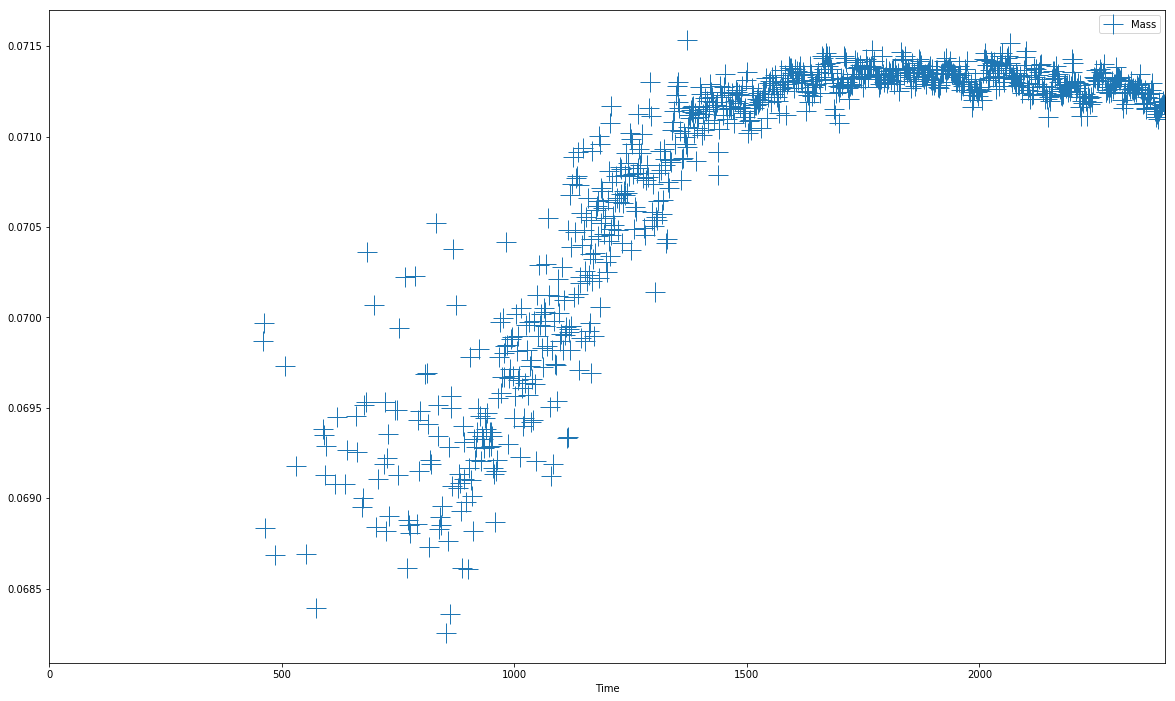

In [10]:
ax = sfr_frac.plot('Time','Mass',linestyle='', marker='+', markersize='20' ,figsize = (20,12))

In [11]:
rec = ['fab_sfr']
send = ['str_pu']
nucs = ()
coms = ()


df3_ = tm.transactions(ev, receivers=rec, senders=send, nucs=nucs, commodities=coms)



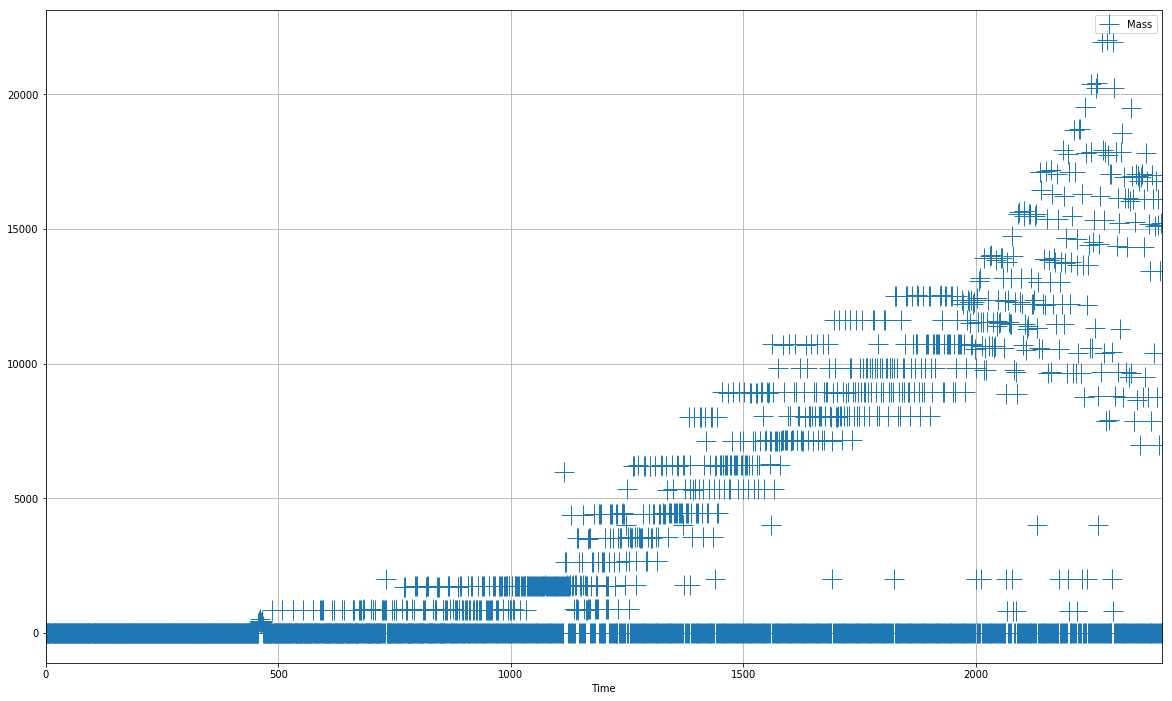

In [12]:
ax = df3_.plot('Time','Mass',linestyle='', marker='+', markersize='20' ,figsize = (20,12))
# Major ticks every 20, minor ticks every 5
#import numpy as np
#major_y_ticks = np.arange(0, 60, 1)

#ax.set_yticks(major_y_ticks)
#major_x_ticks = np.arange(0, 200, 5)
#ax.set_xticks(major_x_ticks)



# And a corresponding grid
ax.grid(which='both')

plt.show()

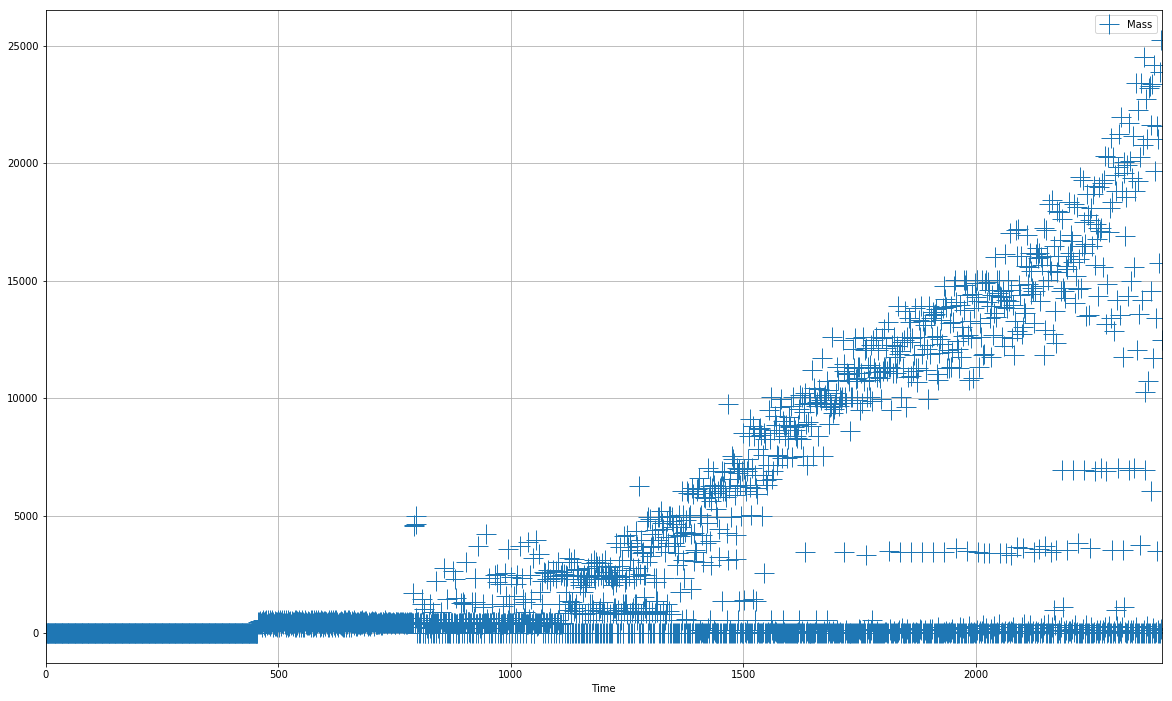

In [13]:
rec = ['str_pu']
send = ()
nucs = ()
coms = ()


df3_ = tm.transactions(ev, receivers=rec, senders=send, nucs=nucs, commodities=coms)

ax = df3_.plot('Time','Mass',linestyle='', marker='+', markersize='20' ,figsize = (20,12))
# Major ticks every 20, minor ticks every 5
#import numpy as np
#major_y_ticks = np.arange(0, 60, 1)

#ax.set_yticks(major_y_ticks)
#major_x_ticks = np.arange(0, 200, 5)
#ax.set_xticks(major_x_ticks)



# And a corresponding grid
ax.grid(which='both')

plt.show()


In [14]:
df3_['Mass'].sum()

7390760.618784571

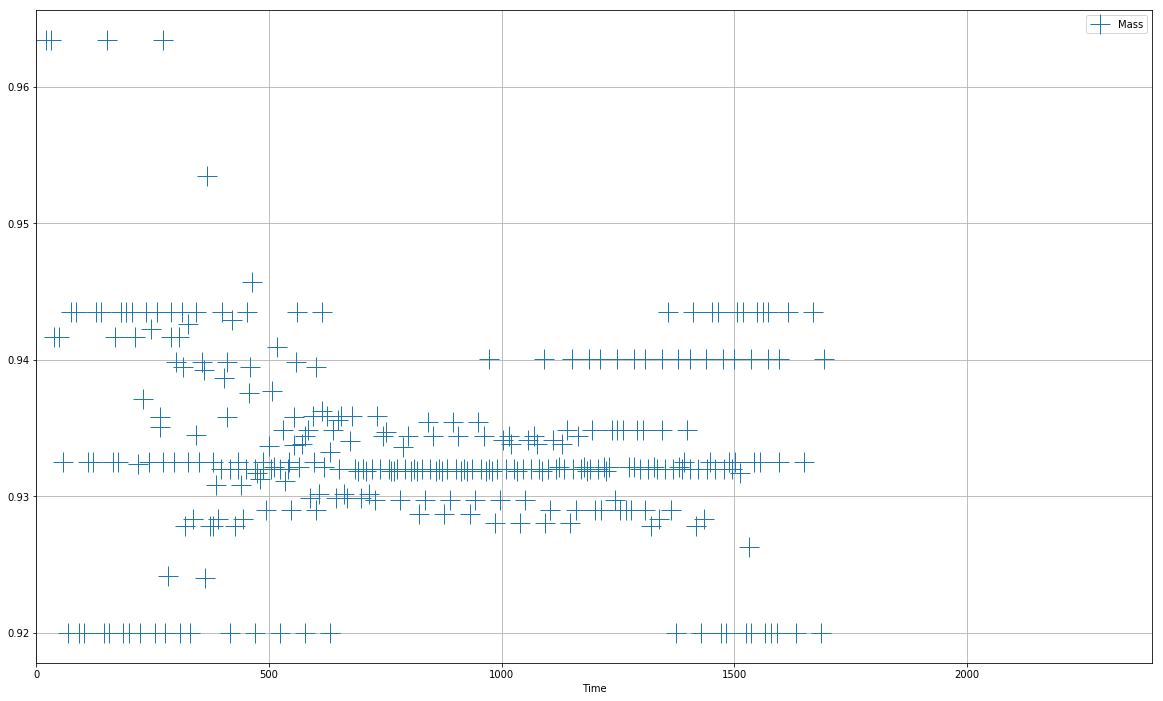

In [15]:
send = ['lwr_a','lwr_b']
rec = ()
nucs = ['U238']
coms = ()


df3__ = tm.transactions(ev, receivers=rec, senders=send, nucs=nucs, commodities=coms)
df3_tot = tm.transactions(ev, receivers=rec, senders=send, commodities=coms)

df3__['Mass'] *= 1./df3_tot['Mass']

ax = df3__.plot('Time','Mass',linestyle='', marker='+', markersize='20' ,figsize = (20,12))
# Major ticks every 20, minor ticks every 5
#import numpy as np
#major_y_ticks = np.arange(0, 60, 1)

#ax.set_yticks(major_y_ticks)
#major_x_ticks = np.arange(0, 200, 5)
#ax.set_xticks(major_x_ticks)



# And a corresponding grid
ax.grid(which='both')

plt.show()

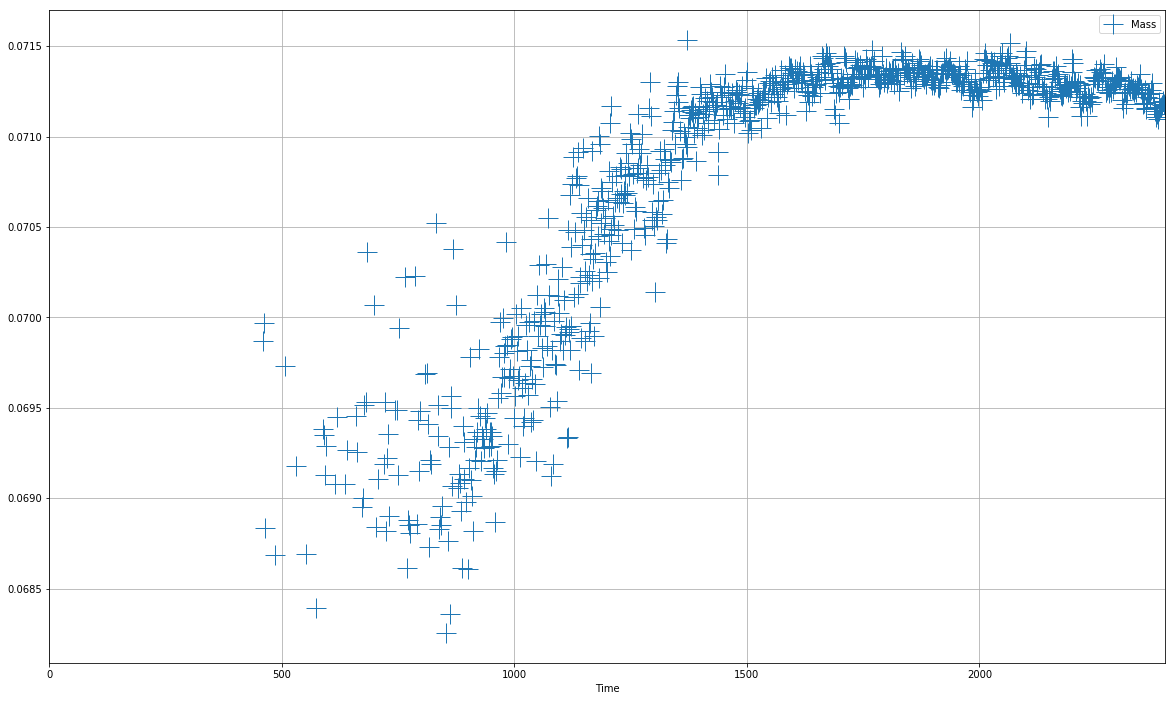

In [16]:
send = ['fab_sfr']
rec = ()
nucs = ['Pu238','Pu239','Pu240','Pu241','Pu242']
coms = ()


df3__ = tm.transactions(ev, receivers=rec, senders=send, nucs=nucs, commodities=coms)
df3_tot = tm.transactions(ev, receivers=rec, senders=send, commodities=coms)

df3__['Mass'] *= 1./df3_tot['Mass']

ax = df3__.plot('Time','Mass',linestyle='', marker='+', markersize='20' ,figsize = (20,12))
# Major ticks every 20, minor ticks every 5
#import numpy as np
#major_y_ticks = np.arange(0, 60, 1)

#ax.set_yticks(major_y_ticks)
#major_x_ticks = np.arange(0, 200, 5)
#ax.set_xticks(major_x_ticks)



# And a corresponding grid
ax.grid(which='both')

plt.show()

In [17]:
df3_tot['Mass'].sum()

86459267.0

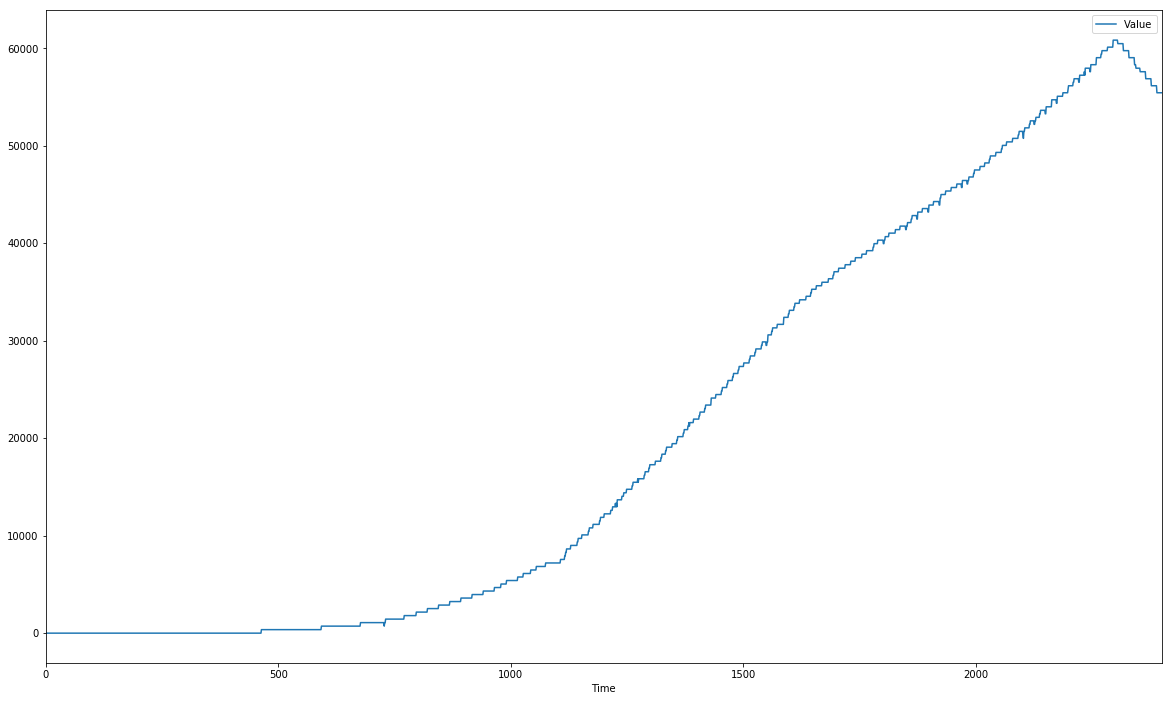

In [18]:
dfp = tm.get_power(ev, facilities=["sfr_a","sfr_b"])
dfp.plot('Time','Value',figsize = (20,12))

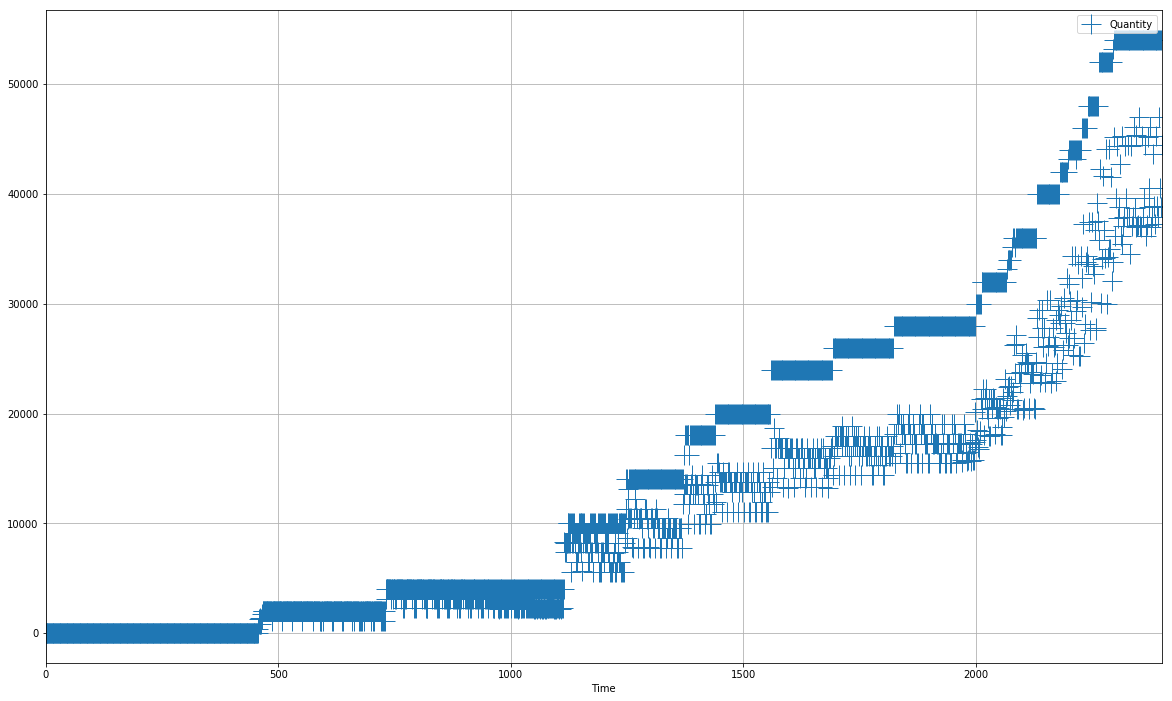

In [19]:
fac = ['fab_sfr']
nucs = ['Pu238','Pu239','Pu240','Pu241','Pu242']
coms = ()


df3 = tm.inventories(ev, facilities=fac, nucs=nucs)


df3_y_m = df3
ax = df3_y_m.plot('Time','Quantity',linestyle='', marker='+', markersize='20' ,figsize = (20,12))
# Major ticks every 20, minor ticks every 5
#import numpy as np
#major_y_ticks = np.arange(0, 60, 1)

#ax.set_yticks(major_y_ticks)
#major_x_ticks = np.arange(0, 200, 5)
#ax.set_xticks(major_x_ticks)



# And a corresponding grid
ax.grid(which='both')

plt.show()

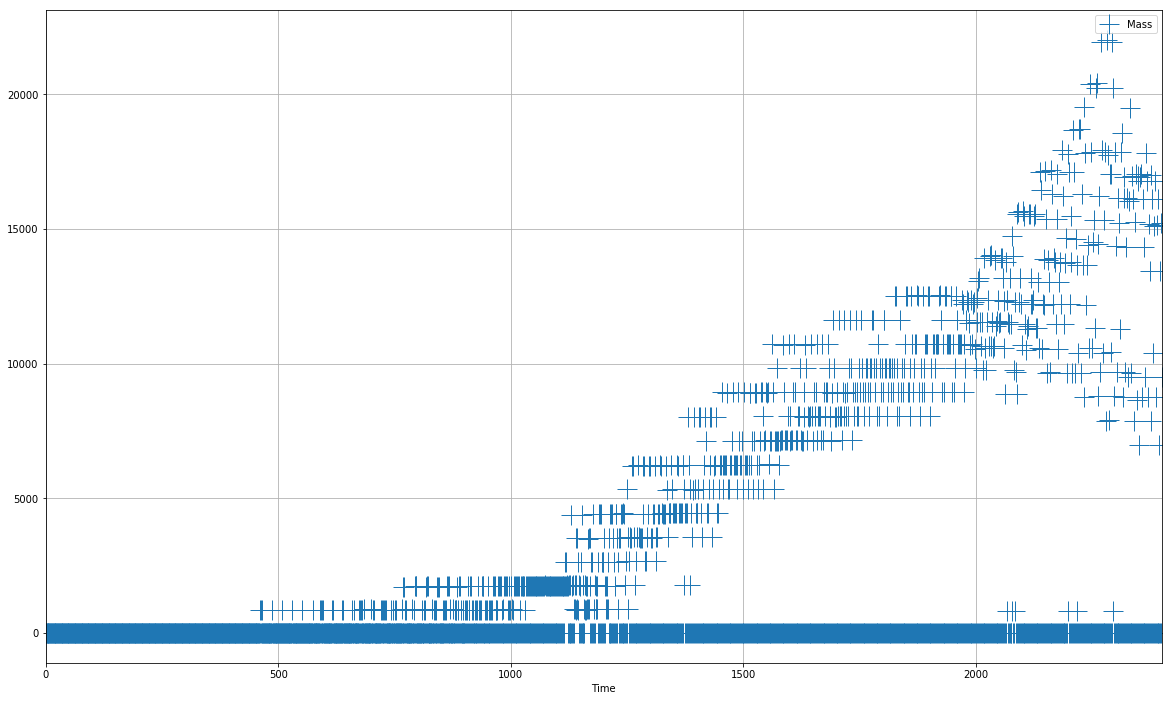

In [20]:
send = ['fab_sfr']
rec = ()
nucs = ['Pu238','Pu239','Pu240','Pu241','Pu242']
coms = ()


df3__ = tm.transactions(ev, receivers=rec, senders=send, nucs=nucs, commodities=coms)
df3_tot = tm.transactions(ev, receivers=rec, senders=send, commodities=coms)

#df3__['Mass'] *= 1./df3_tot['Mass']

ax = df3__.plot('Time','Mass',linestyle='', marker='+', markersize='20' ,figsize = (20,12))
# Major ticks every 20, minor ticks every 5
#import numpy as np
#major_y_ticks = np.arange(0, 60, 1)

#ax.set_yticks(major_y_ticks)
#major_x_ticks = np.arange(0, 200, 5)
#ax.set_xticks(major_x_ticks)



# And a corresponding grid
ax.grid(which='both')

plt.show()

In [21]:
df3__.sum()

1.558190e+06\s1

SyntaxError: unexpected character after line continuation character (<ipython-input-21-eed3020a3e3d>, line 3)

In [ ]:
df3_y_m